# Load Data & Import Libraries

In [272]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
import xgboost as xgb
# Download latest version
dataset_dir = kagglehub.dataset_download("hopesb/student-depression-dataset")
file_name = 'Student Depression Dataset.csv'
file_path = os.path.join(dataset_dir, file_name)

df = pd.read_csv(file_path)

# Data Analysis

In [194]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [196]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [197]:
df.drop(['id','Age'],axis=1,inplace=True)

**Separating the Numerical and Categorical Columns to visualize**

In [198]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_data = df[categorical_columns]


In [199]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_data = df[numerical_columns]

In [200]:
numerical_data.describe()

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [201]:
numerical_data[numerical_data["Depression"] == 0].describe()

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11565.000000,11563.000000,11565.0
mean,2.361608,0.000605,7.617282,3.215564,0.000865,6.237959,2.518724,0.0
std,1.252937,0.050074,1.492207,1.327398,0.050927,3.860943,1.346952,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,1.000000,0.000000,6.250000,2.000000,0.000000,3.000000,1.000000,0.0
50%,2.000000,0.000000,7.640000,3.000000,0.000000,6.000000,2.000000,0.0
75%,3.000000,0.000000,8.930000,4.000000,0.000000,10.000000,4.000000,0.0
max,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,0.0


In [202]:
df.duplicated().sum()

np.int64(1)

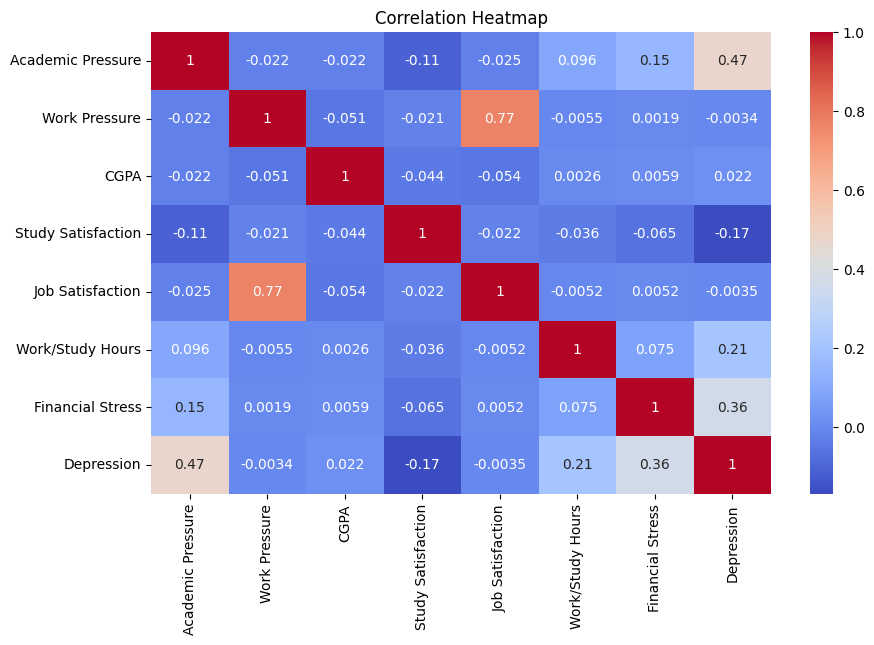

In [203]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

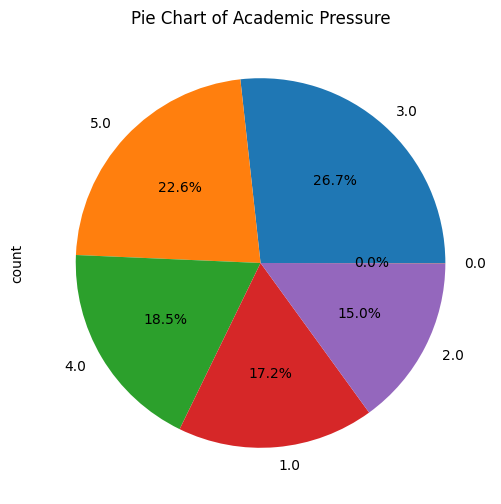

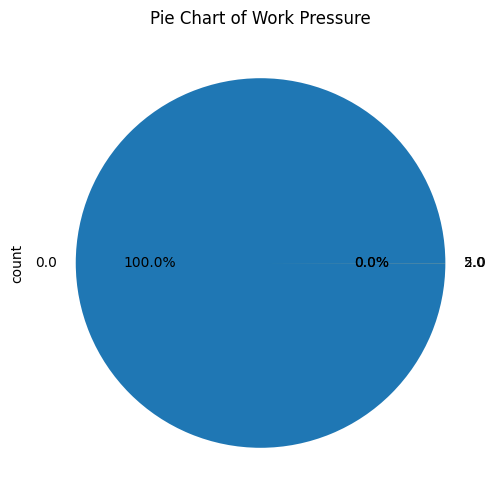

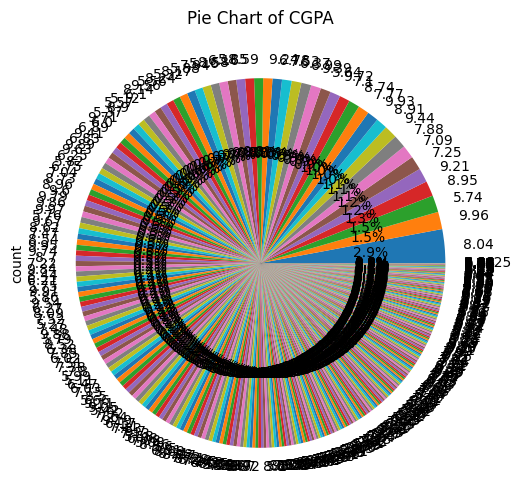

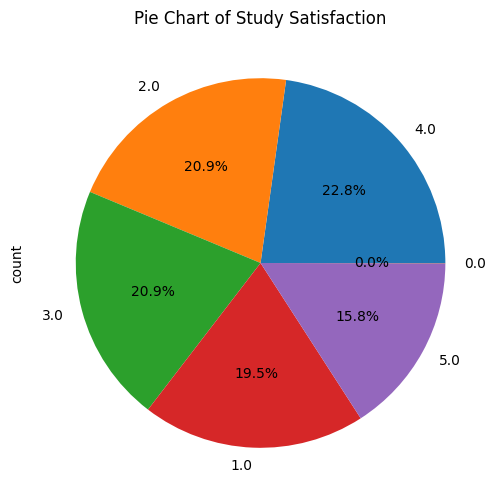

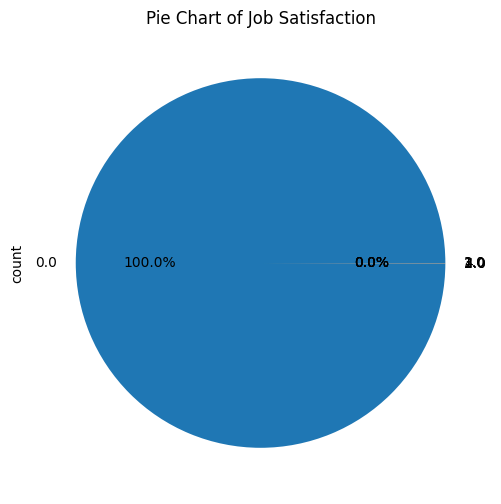

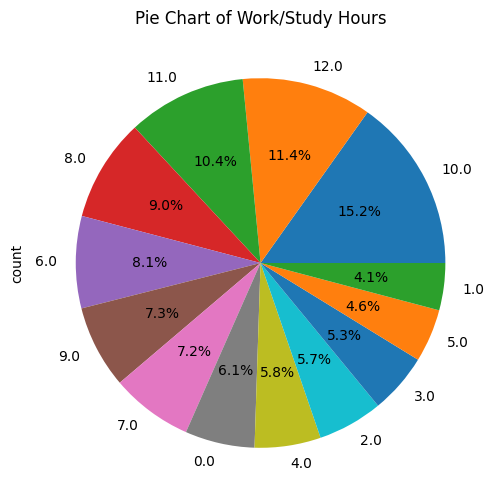

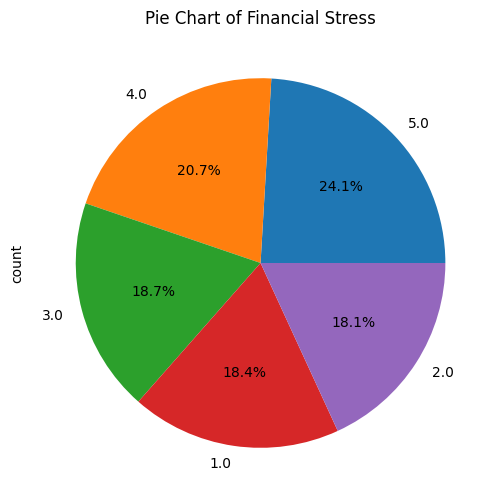

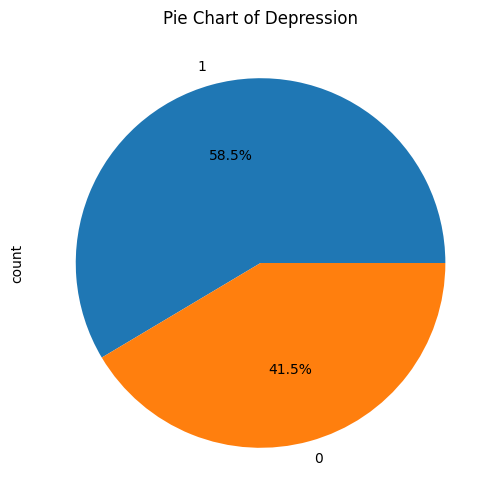

In [204]:
for column in numerical_data.columns:
    plt.figure(figsize=(8, 6))
    numerical_data[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()


In [205]:
# drop the rows where acedmic pressure and Study Satisfaction is 0.0

df = df[(df['Academic Pressure'] != 0.0) | (df['Study Satisfaction'] != 0.0)]
display(df.head())

,Gender,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [206]:
df.drop(columns=["Work Pressure","Job Satisfaction"], inplace=True)

/tmp/ipython-input-206-3112407089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Work Pressure","Job Satisfaction"], inplace=True)


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27894 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27894 non-null  object 
 1   City                                   27894 non-null  object 
 2   Profession                             27894 non-null  object 
 3   Academic Pressure                      27894 non-null  float64
 4   CGPA                                   27894 non-null  float64
 5   Study Satisfaction                     27894 non-null  float64
 6   Sleep Duration                         27894 non-null  object 
 7   Dietary Habits                         27894 non-null  object 
 8   Degree                                 27894 non-null  object 
 9   Have you ever had suicidal thoughts ?  27894 non-null  object 
 10  Work/Study Hours                       27894 non-null  float64
 11  Financi

In [208]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

In [209]:
numerical_data.head()

,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,5.0,8.97,2.0,3.0,1.0,1
1,2.0,5.90,5.0,3.0,2.0,0
2,3.0,7.03,5.0,9.0,1.0,0
3,3.0,5.59,2.0,4.0,5.0,1
4,4.0,8.13,3.0,1.0,1.0,0


In [210]:
df[df['CGPA'] > 5.00 ].value_counts()

Gender  City      Profession  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration     Dietary Habits  Degree    Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  Family History of Mental Illness  Depression
Male    Lucknow   Student     3.0                7.88  2.0                 5-6 hours          Unhealthy       M.Tech    Yes                                    3.0               5.0               Yes                               1             2
        Kanpur    Student     1.0                8.61  1.0                 Less than 5 hours  Healthy         M.Ed      Yes                                    3.0               2.0               Yes                               0             1
                                                 8.59  1.0                 Less than 5 hours  Healthy         MD        Yes                                    0.0               1.0               No                                0             1
                                                 8.50  3.0                 7-8 hours          Moderate        BA        Yes                                    11.0              4.0               Yes                               0             1
                                                 8.14  4.0                 More than 8 hours  Unhealthy       B.Tech    No                                     4.0               4.0               No                                0             1
                                                                                                                                                                                                                                                  ..
Female  Srinagar  Student     4.0                9.72  4.0                 7-8 hours          Unhealthy       MBBS      Yes                                    12.0              5.0               Yes                               1             1
                                                       3.0                 Less than 5 hours  Unhealthy       Class 12  Yes                                    12.0              1.0               Yes                               1             1
                                                       1.0                 Less than 5 hours  Unhealthy       B.Tech    Yes                                    12.0              3.0               No                                1             1
                                                 9.71  2.0                 7-8 hours          Moderate        BCA       Yes                                    11.0              4.0               No                                1             1
                                                 9.96  5.0                 7-8 hours          Unhealthy       M.Ed      Yes                                    10.0              5.0               No                                1             1
Name: count, Length: 27887, dtype: int64

In [211]:
numerical_data= numerical_data[numerical_data['CGPA'] >= 5.00]
numerical_data.shape

(27891, 6)

In [212]:
numerical_data.head()

,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,5.0,8.97,2.0,3.0,1.0,1
1,2.0,5.90,5.0,3.0,2.0,0
2,3.0,7.03,5.0,9.0,1.0,0
3,3.0,5.59,2.0,4.0,5.0,1
4,4.0,8.13,3.0,1.0,1.0,0


In [213]:
satisfy_cgpa = numerical_data.groupby('CGPA')[['Financial Stress','Study Satisfaction']].mean().sort_values(by="CGPA",ascending=False)
display(satisfy_cgpa)

,Financial Stress,Study Satisfaction
CGPA,,
10.00,3.189655,2.775862
9.98,3.118644,3.000000
9.97,2.971223,2.812950
9.96,3.185882,2.701176
9.95,3.285714,3.052632
...,...,...
5.10,3.030303,2.969697
5.09,2.900000,3.250000
5.08,3.031579,3.115789


In [214]:
pressure_work = numerical_data.groupby('Work/Study Hours')[['Academic Pressure','CGPA']].mean().sort_values(by='CGPA', ascending=False)
pressure_work.reset_index(inplace =True)
display(pressure_work)

,Work/Study Hours,Academic Pressure,CGPA
0,3.0,3.036079,7.767495
1,9.0,3.149209,7.717091
2,1.0,2.920870,7.708313
3,12.0,3.298423,7.686886
4,10.0,3.257264,7.680208
5,4.0,3.073110,7.655235
6,2.0,3.001259,7.650818
7,11.0,3.247665,7.646067
8,7.0,3.156422,7.639995
9,5.0,3.110340,7.636813


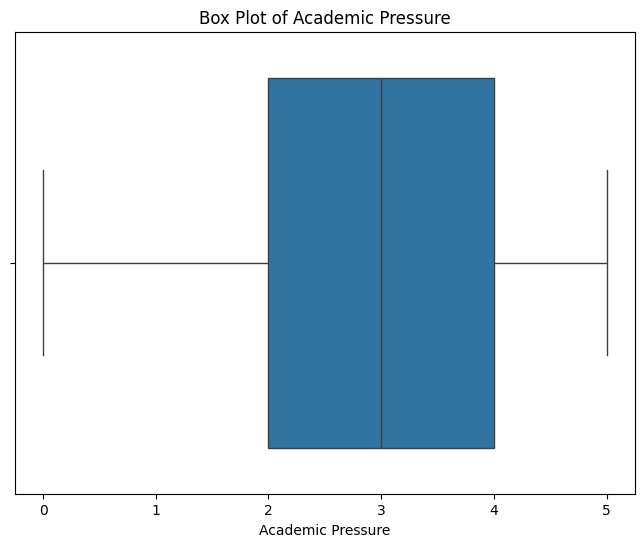

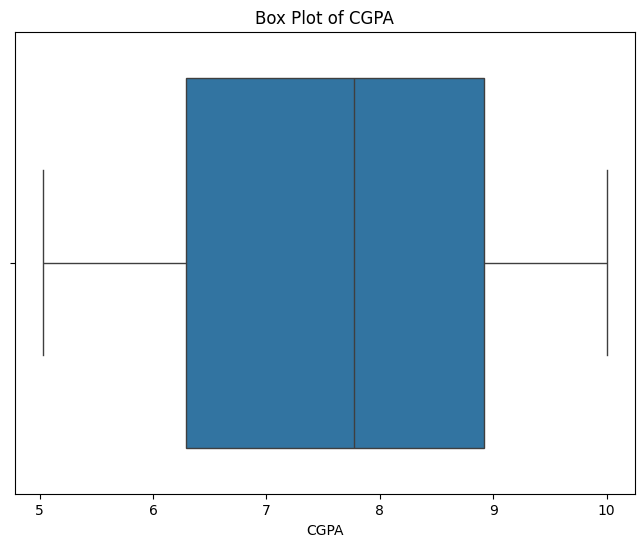

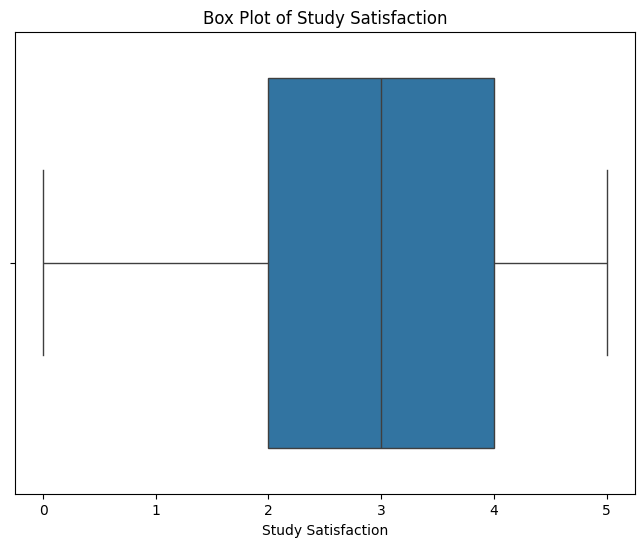

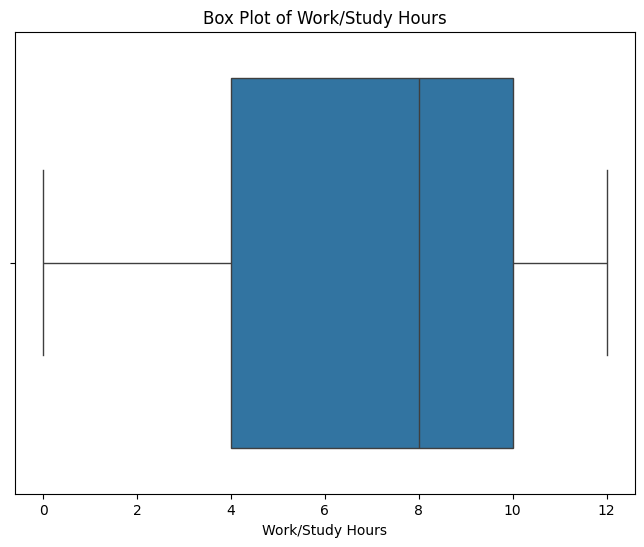

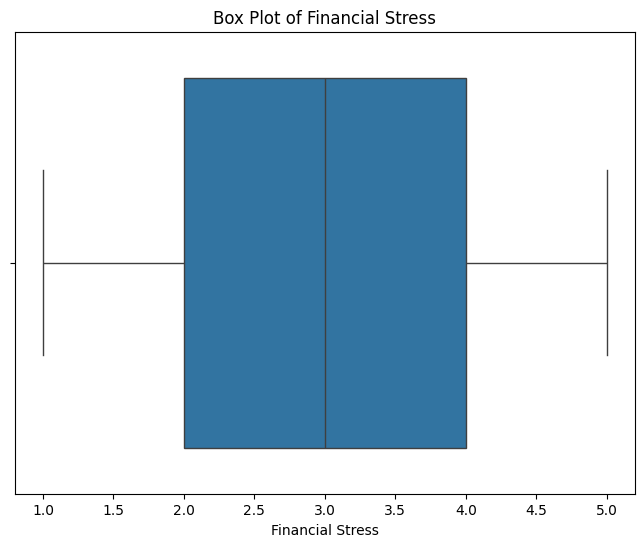

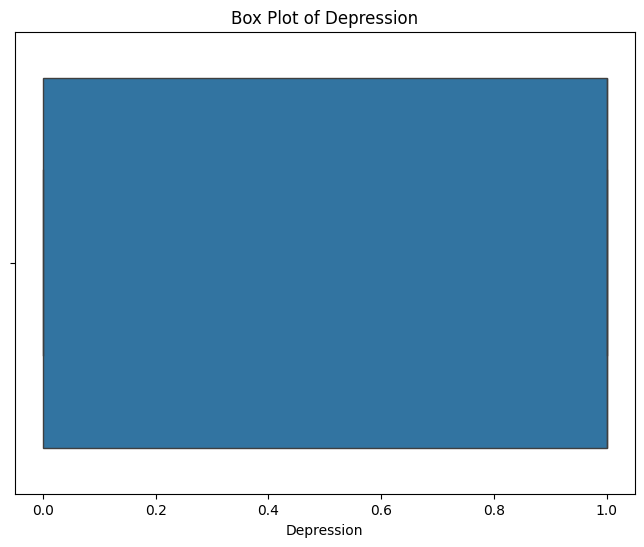

In [215]:
for col in numerical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


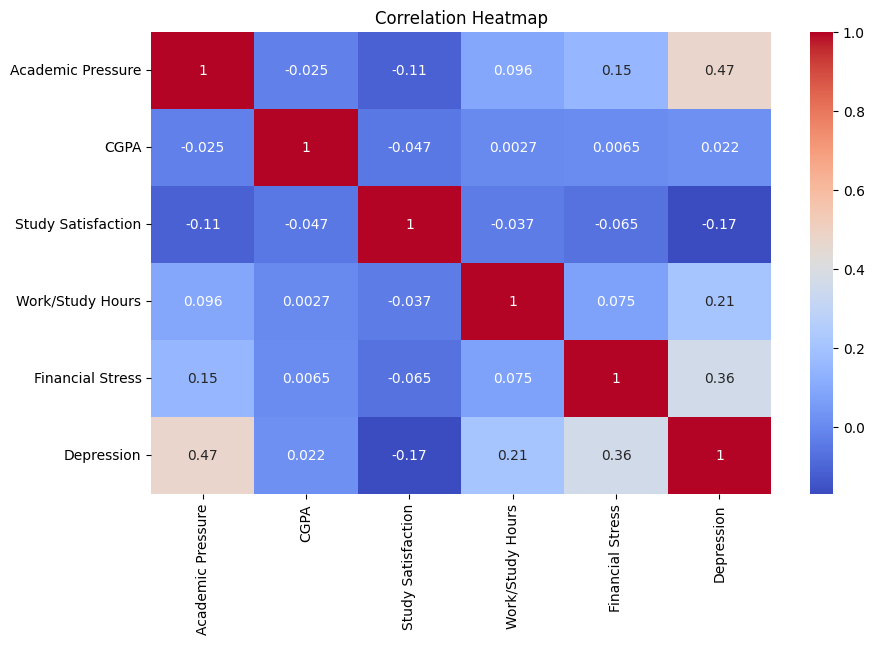

In [216]:
#correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

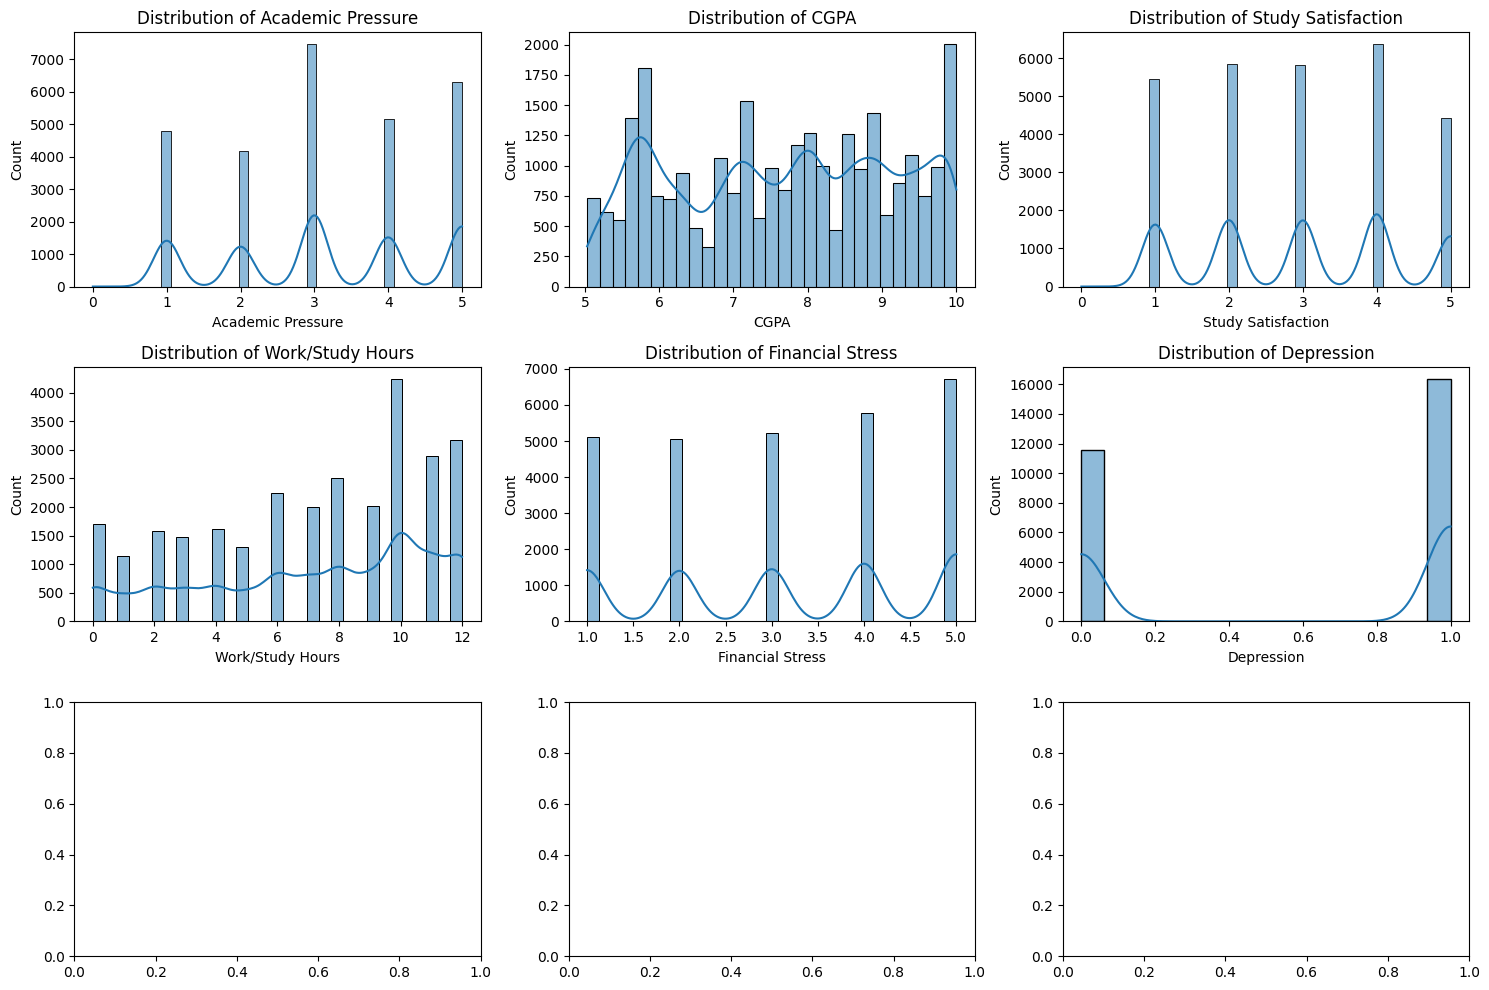

In [217]:
#plot all the numeric columns to check thier distribution in subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, col in enumerate(numerical_data.columns):
    row = i // 3
    col_idx = i % 3
    sns.histplot(data=numerical_data, x=col, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


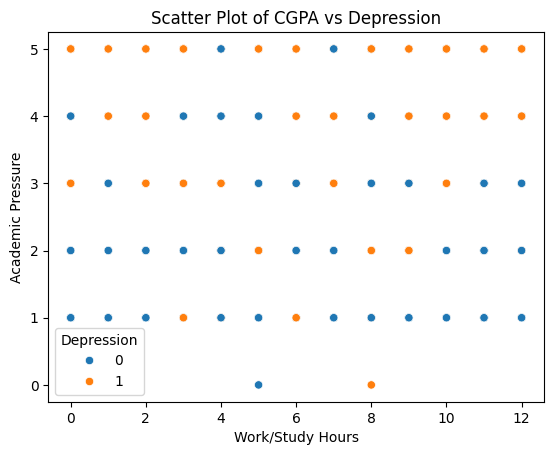

In [218]:
sns.scatterplot(data=numerical_data, x='Work/Study Hours', y="Academic Pressure",hue="Depression")
plt.title('Scatter Plot of CGPA vs Depression')
plt.show()

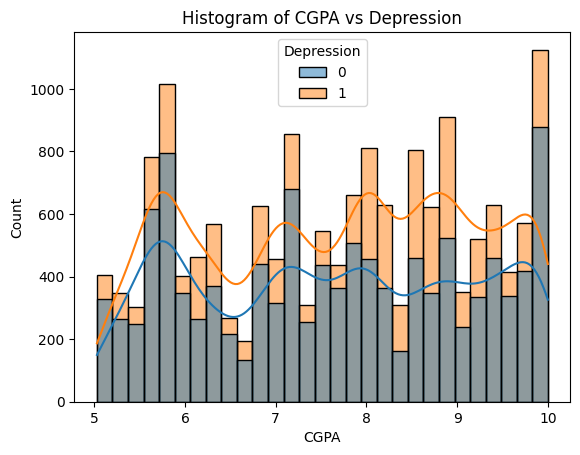

In [219]:
sns.histplot(data=numerical_data, x='CGPA', hue='Depression', kde=True)
plt.title('Histogram of CGPA vs Depression')
plt.show()

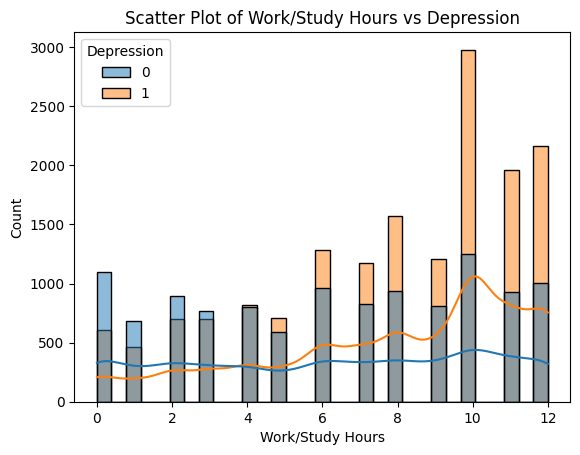

In [220]:
#x = study hours , y= CGPA , hue = depressino
sns.histplot(data=numerical_data, x='Work/Study Hours',hue="Depression", kde = True)
plt.title('Scatter Plot of Work/Study Hours vs Depression')
plt.show()

In [221]:
# check if there is depression above 4 work hours and below 12
numerical_data[(numerical_data["Work/Study Hours"] < 12) & (numerical_data["Work/Study Hours"]  > 4)]["Depression"].value_counts()

,count
Depression,
1,10888
0,6313


In [222]:
numerical_data["Financial Stress"].isna().sum()

np.int64(3)

In [223]:
df["Financial Stress"].fillna(df["Financial Stress"].mean(), inplace=True)

/tmp/ipython-input-223-3211514544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Financial Stress"].fillna(df["Financial Stress"].mean(), inplace=True)


In [224]:
df["Financial Stress"].isna().sum()

np.int64(0)

# Numerical Data Insights

**Preprocessing Insights**

The numerical data is quite cleaned and filled with no duplicates.

- Impute *Financial Stress* Coulmn which only has 3 nans.
- No Outliers in the dataset

**Visualization Insights**

- Dataset was quite balanced but the CGPA column is highly Right Skewed
- Columns like Academic Pressure, Financial Stress and Work/Study Hours has good correlation with the depression. But CGPA shows almost no correlation.
- We have more depression in the students with high CGPA, high Study hours as compared to the low ones.

It seems like the CGPA column is abnormal with the data which could make the model confuse. But still it is an important feature to deal into Academic!


In [225]:
categorical_data.head()

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Male,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,5-6 hours,Moderate,BSc,No,Yes
2,Male,Srinagar,Student,Less than 5 hours,Healthy,BA,No,Yes
3,Female,Varanasi,Student,7-8 hours,Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,5-6 hours,Moderate,M.Tech,Yes,No


In [226]:
df.drop(columns=["City","Degree"],inplace=True)

In [227]:
df.drop(columns=["Profession"],inplace=True)

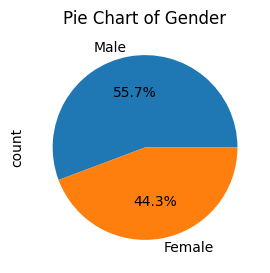

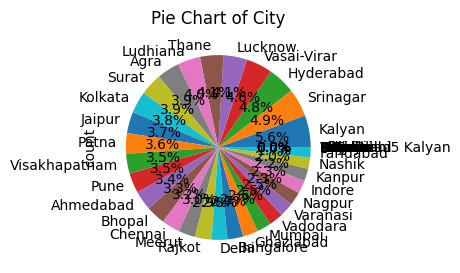

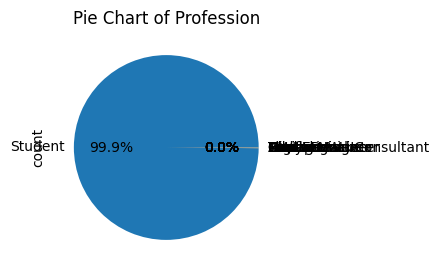

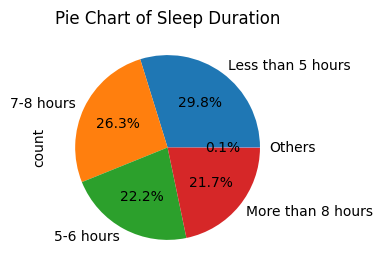

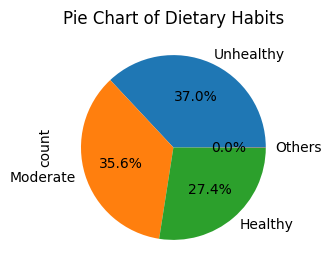

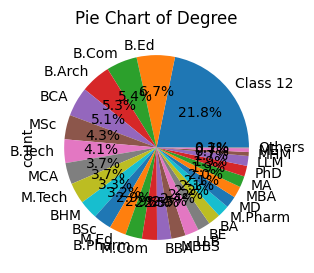

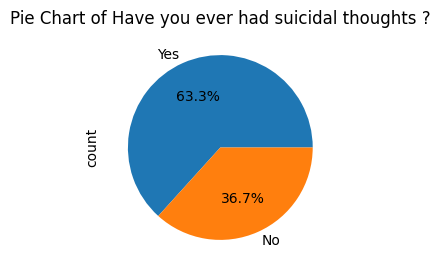

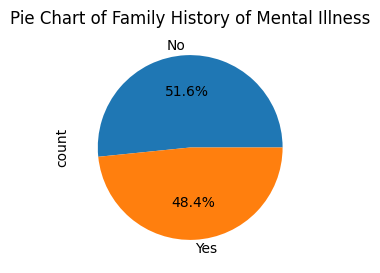

In [228]:
# prompt: a loop for plotting pie chart for categorical data

for column in categorical_data.columns:
    plt.figure(figsize=(5, 3))
    categorical_data[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()


In [229]:
df["Gender"] = df["Gender"].map({"Male":0,"Female":1})

In [230]:
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].map({"Yes":1,"No":0})
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map({"Yes":1,"No":0})


In [231]:
df[df["Dietary Habits"] == "Others"]["Dietary Habits"].value_counts().sum()

np.int64(12)

In [232]:
df = df[df["Dietary Habits"] != "Others"]

In [233]:
from sklearn.preprocessing import OrdinalEncoder

# Sample data
data = df[["Dietary Habits"]]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Healthy', 'Moderate', 'Unhealthy']])

# Fit and transform the data
encoded_data = ordinal_encoder.fit_transform(data)
df[["Dietary Habits"]] = encoded_data

print(encoded_data)


[[0.]
 [1.]
 [0.]
 ...
 [2.]
 [0.]
 [0.]]


/tmp/ipython-input-233-1320272880.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Dietary Habits"]] = encoded_data


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27882 entries, 0 to 27900
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27882 non-null  int64  
 1   Academic Pressure                      27882 non-null  float64
 2   CGPA                                   27882 non-null  float64
 3   Study Satisfaction                     27882 non-null  float64
 4   Sleep Duration                         27882 non-null  object 
 5   Dietary Habits                         27882 non-null  float64
 6   Have you ever had suicidal thoughts ?  27882 non-null  int64  
 7   Work/Study Hours                       27882 non-null  float64
 8   Financial Stress                       27882 non-null  float64
 9   Family History of Mental Illness       27882 non-null  int64  
 10  Depression                             27882 non-null  int64  
dtypes: floa

In [235]:
df["Sleep Duration"].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [236]:
df = df[df["Sleep Duration"] != "Others"]

In [237]:
df['Sleep Duration'] = df['Sleep Duration'].map({'Less than 5 hours': 5, '5-6 hours': 6,'7-8':7, 'More than 8 hours': 8})

/tmp/ipython-input-237-1708135234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep Duration'] = df['Sleep Duration'].map({'Less than 5 hours': 5, '5-6 hours': 6,'7-8':7, 'More than 8 hours': 8})


In [238]:
df = df.dropna(subset=['Sleep Duration'])

In [239]:
df['Sleep Duration'].isnull().sum()

np.int64(0)

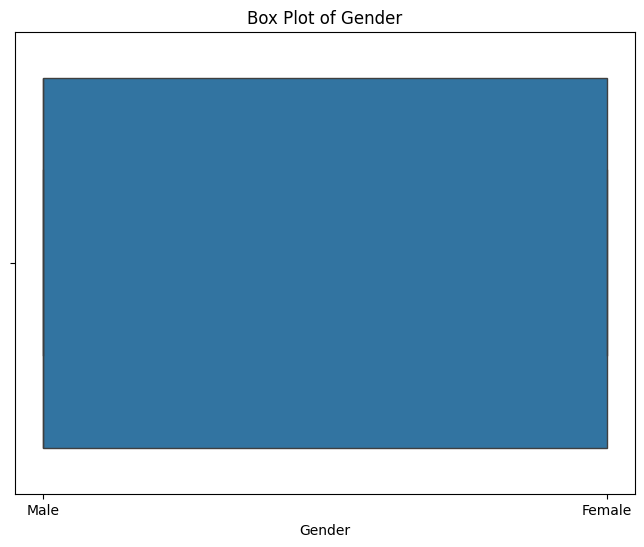

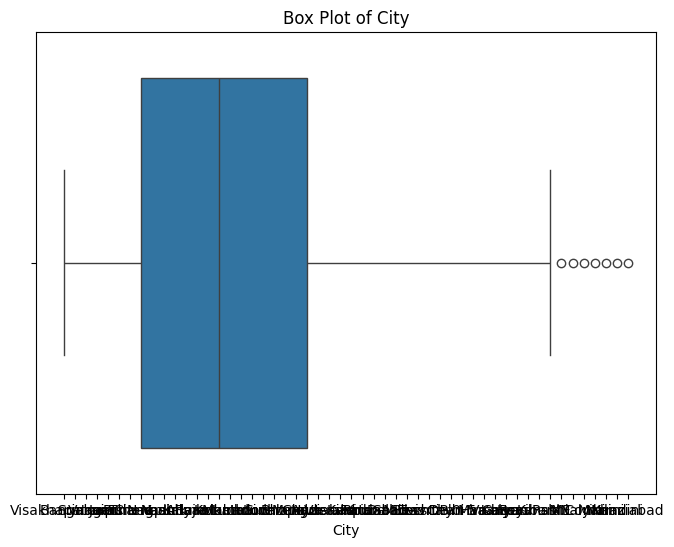

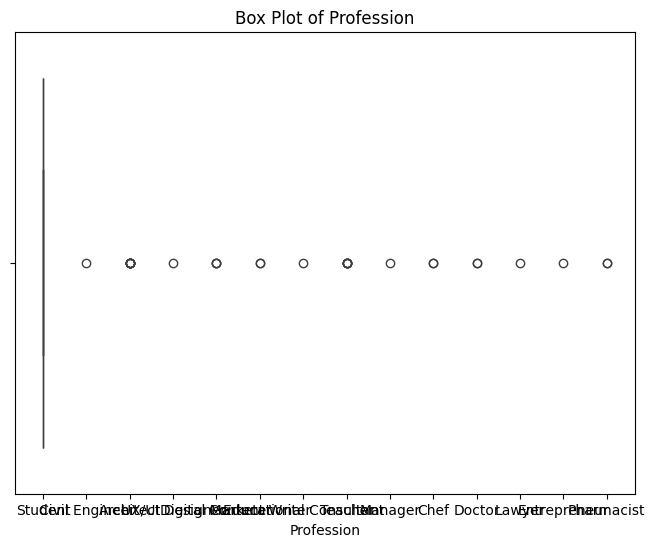

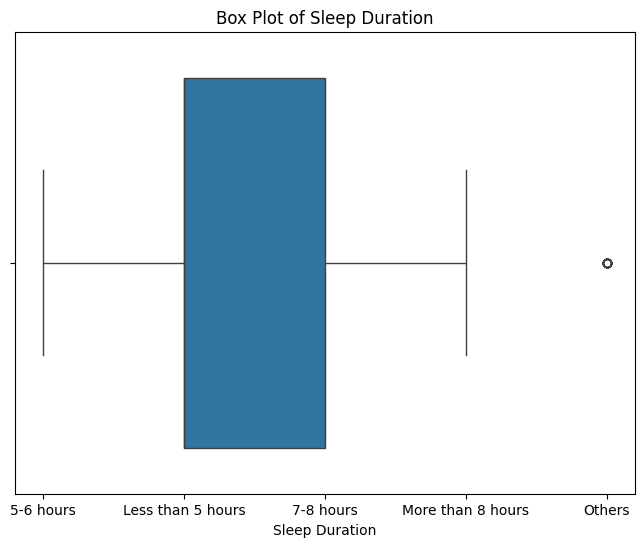

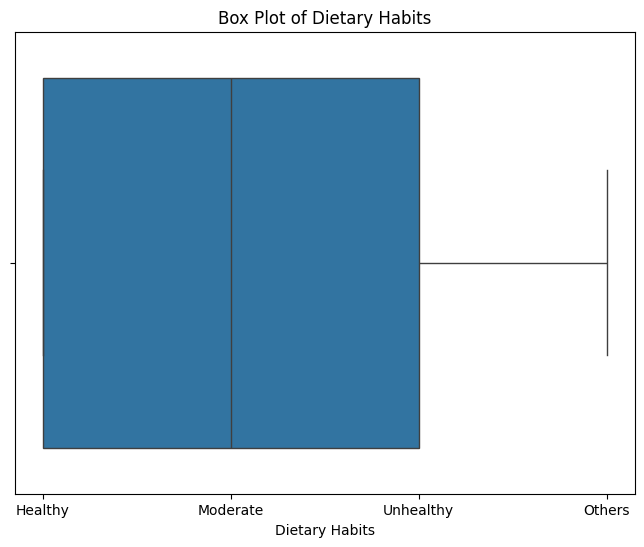

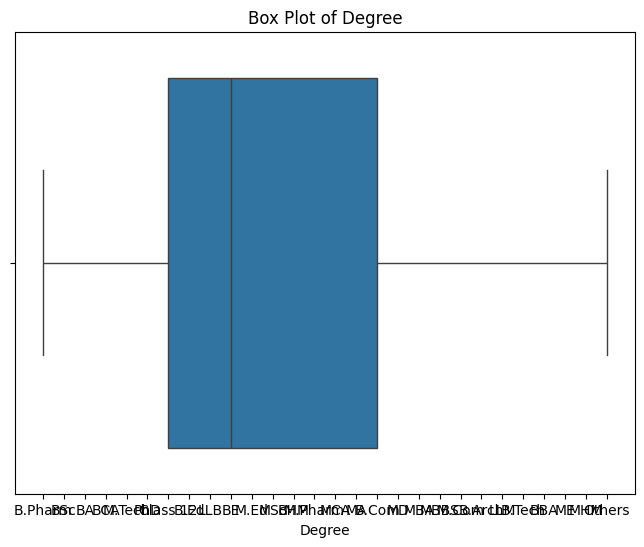

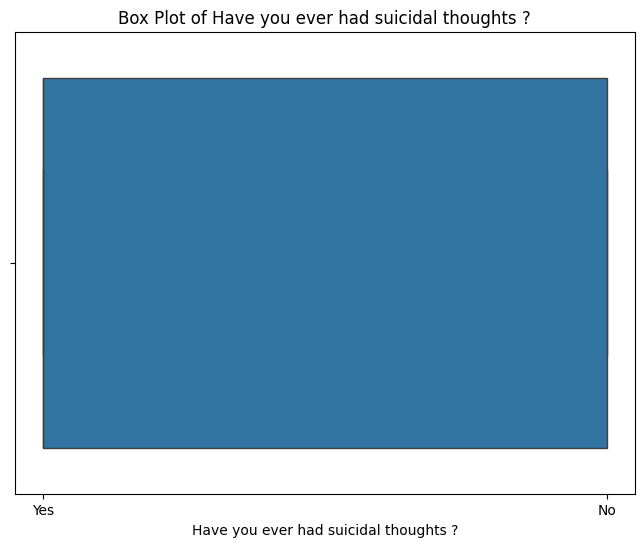

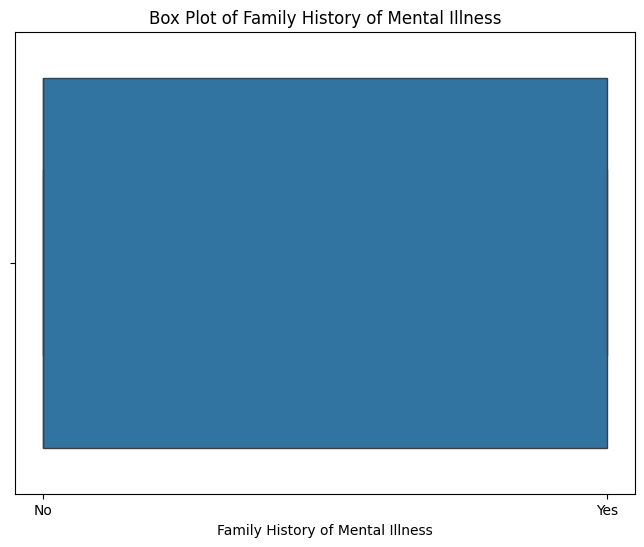

In [240]:
# prompt: boxplot for categorical_data in loop

for column in categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


In [241]:
categorical_data.isnull().sum()

,0
Gender,0
City,0
Profession,0
Sleep Duration,0
Dietary Habits,0
Degree,0
Have you ever had suicidal thoughts ?,0
Family History of Mental Illness,0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20523 entries, 0 to 27900
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 20523 non-null  int64  
 1   Academic Pressure                      20523 non-null  float64
 2   CGPA                                   20523 non-null  float64
 3   Study Satisfaction                     20523 non-null  float64
 4   Sleep Duration                         20523 non-null  float64
 5   Dietary Habits                         20523 non-null  float64
 6   Have you ever had suicidal thoughts ?  20523 non-null  int64  
 7   Work/Study Hours                       20523 non-null  float64
 8   Financial Stress                       20523 non-null  float64
 9   Family History of Mental Illness       20523 non-null  int64  
 10  Depression                             20523 non-null  int64  
dtypes: floa

In [243]:
categorical_data = df[["Gender","Family History of Mental Illness","Have you ever had suicidal thoughts ?","Dietary Habits","Sleep Duration"]]
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20523 entries, 0 to 27900
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 20523 non-null  int64  
 1   Family History of Mental Illness       20523 non-null  int64  
 2   Have you ever had suicidal thoughts ?  20523 non-null  int64  
 3   Dietary Habits                         20523 non-null  float64
 4   Sleep Duration                         20523 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 962.0 KB


In [244]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [259]:
import numpy as np
df['CGPA_log'] = np.log(df['CGPA'] + 1)  # +1 to avoid log(0)

In [260]:
X = df.drop(columns=["Depression","CGPA"])
y = df["Depression"]

In [261]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

def get_numerical_feature_scores(X, y):
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X_numerical = X[numerical_cols]

    mi_scores = mutual_info_classif(X_numerical, y, discrete_features=False)

    scores = pd.Series(mi_scores, index=numerical_cols)
    return scores.sort_values(ascending=False)

feature_scores = get_numerical_feature_scores(X,y)
print(feature_scores)

Have you ever had suicidal thoughts ?    0.162917
Academic Pressure                        0.126986
Financial Stress                         0.071141
Work/Study Hours                         0.024587
Dietary Habits                           0.015139
Study Satisfaction                       0.011088
CGPA_log                                 0.008267
Sleep Duration                           0.005747
Family History of Mental Illness         0.001609
Gender                                   0.000000
dtype: float64


In [262]:
# X data correlation with y
corr_matrix = X.corrwith(y)
print(corr_matrix)

Gender                                  -0.005362
Academic Pressure                        0.479377
Study Satisfaction                      -0.168470
Sleep Duration                          -0.111493
Dietary Habits                           0.206070
Have you ever had suicidal thoughts ?    0.547626
Work/Study Hours                         0.206094
Financial Stress                         0.362115
Family History of Mental Illness         0.057811
CGPA_log                                 0.022398
dtype: float64


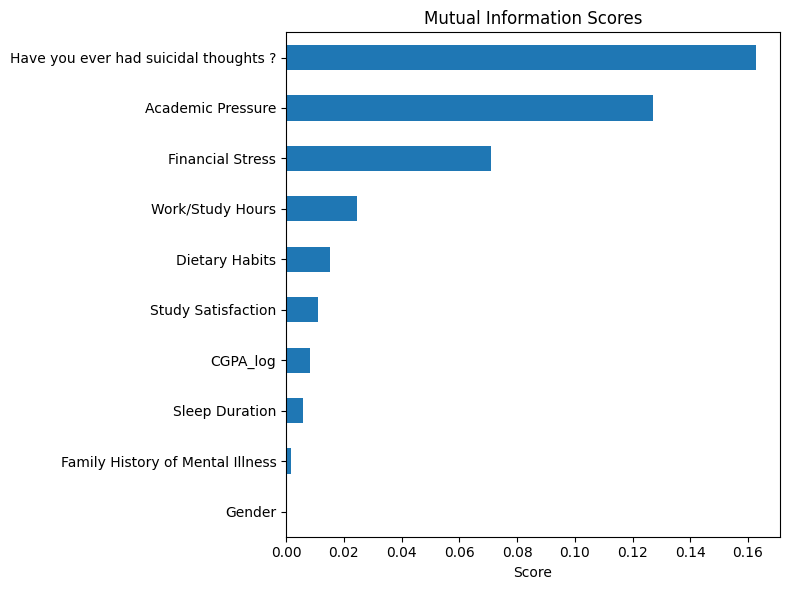

In [263]:
import matplotlib.pyplot as plt

feature_scores.sort_values().plot(kind='barh', figsize=(8, 6), title="Mutual Information Scores")
plt.xlabel("Score")
plt.tight_layout()
plt.show()


In [264]:
X.drop(["Gender"],axis=1,inplace=True)

In [265]:
X.drop(["Family History of Mental Illness"],axis=1,inplace=True)

In [276]:
X.head()

,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,CGPA_log
0,5.0,2.0,6.0,0.0,1,3.0,1.0,2.299581
1,2.0,5.0,6.0,1.0,0,3.0,2.0,1.931521
2,3.0,5.0,5.0,0.0,0,9.0,1.0,2.083185
4,4.0,3.0,6.0,1.0,1,1.0,1.0,2.211566
5,2.0,3.0,5.0,0.0,0,4.0,1.0,1.902108


In [266]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_trans = scaler.fit_transform(X)

imp = KNNImputer(n_neighbors=2)
df_trans = imp.fit_transform(df_trans)

In [278]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_trans, y, test_size=0.2, random_state=42,stratify=y)

In [268]:
X_train.shape

(16418, 8)

In [269]:
X_test.shape

(4105, 8)

In [270]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}

results = []

for name, model in models.items():
    print(f"\n Training {name}...")

    if name in ['Logistic Regression', 'SVC']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))
    print("🔍 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    results.append((name, acc))


best_model = max(results, key=lambda x: x[1])
print(f"\n🏆 Best Model: {best_model[0]} with Accuracy: {best_model[1]:.4f}")


 Training Logistic Regression...
✅ Accuracy: 0.8477
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1715
           1       0.86      0.88      0.87      2390

    accuracy                           0.85      4105
   macro avg       0.84      0.84      0.84      4105
weighted avg       0.85      0.85      0.85      4105

🔍 Confusion Matrix:
[[1375  340]
 [ 285 2105]]

 Training Decision Tree...
✅ Accuracy: 0.7639
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1715
           1       0.80      0.80      0.80      2390

    accuracy                           0.76      4105
   macro avg       0.76      0.76      0.76      4105
weighted avg       0.76      0.76      0.76      4105

🔍 Confusion Matrix:
[[1230  485]
 [ 484 1906]]

 Training Random Forest...
✅ Accuracy: 0.8268
📊 Classification Report:
              precision    rec

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:49:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.8300
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1715
           1       0.84      0.87      0.86      2390

    accuracy                           0.83      4105
   macro avg       0.83      0.82      0.82      4105
weighted avg       0.83      0.83      0.83      4105

🔍 Confusion Matrix:
[[1328  387]
 [ 311 2079]]

🏆 Best Model: Logistic Regression with Accuracy: 0.8477


In [273]:

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear'],               # Must be compatible with l1
    'max_iter': [100, 200, 300]
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-val accuracy: 0.8378606730200943


In [274]:
model  = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1715
           1       0.86      0.88      0.87      2390

    accuracy                           0.85      4105
   macro avg       0.84      0.84      0.84      4105
weighted avg       0.85      0.85      0.85      4105



In [275]:
import pickle
with open('student_depression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
